# **Student Performance Prediction using KNN Regression**

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

> **1. Data Pre-Processing :**

In [3]:
df = pd.read_csv('/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv')


In [4]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [7]:
df['Extracurricular Activities'].unique()

array(['Yes', 'No'], dtype=object)

In [8]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].replace({'Yes':1, 'No':2})

In [9]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,2,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,2,8,5,66.0


In [10]:
df.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0
9999,7,74,2,8,1,64.0


In [11]:
X = df.drop('Performance Index', axis=1)
Y = df['Performance Index']

In [12]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

> **2. Create and Train Model :**

In [15]:
from sklearn.neighbors import KNeighborsRegressor

In [17]:
knn_regr = KNeighborsRegressor(n_neighbors=5)
knn_regr.fit(x_train, y_train)

KNeighborsRegressor()

> **3. Predict Test Set Results :**

In [18]:
y_pred = knn_regr.predict(x_test)

In [19]:
pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

,Actual,Predicted
6252,51.0,56.6
4684,20.0,24.4
1731,46.0,48.4
4742,28.0,30.0
4521,41.0,43.4
...,...,...
6412,45.0,45.4
8285,66.0,62.2
7853,16.0,17.0
1095,65.0,63.0


> **4. Evaluate Performance of Model :**

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
mae = mean_absolute_error(y_test, y_pred)
mae

1.9525

In [23]:
mse = mean_squared_error(y_test, y_pred)
mse

5.977620000000001

In [24]:
rmse = np.sqrt(mse)
rmse

2.4449171765113027

In [25]:
r2 = r2_score(y_test, y_pred)
r2

0.9838697785153357

> **5. Visualize Result :**

In [30]:
y_pred.shape

(2000,)

In [38]:
x_range = np.linspace(min(x_test['Previous Scores'].values), max(x_test['Previous Scores'].values), 2000).reshape(-1, 1)

x_range

array([[40.        ],
       [40.02951476],
       [40.05902951],
       ...,
       [98.94097049],
       [98.97048524],
       [99.        ]])

In [39]:
x_test['Previous Scores'].values.shape, y_pred.shape

((2000,), (2000,))

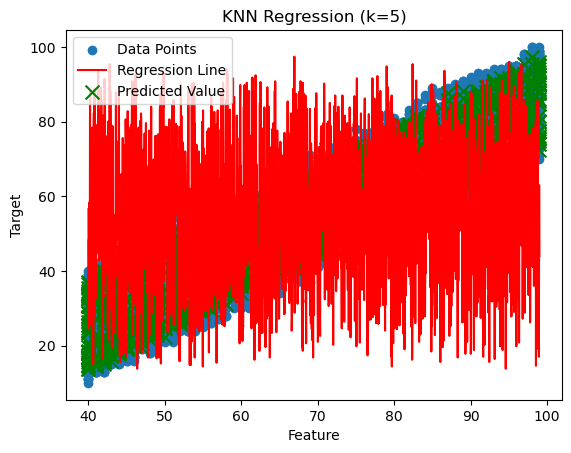

In [40]:
plt.scatter(x_train['Previous Scores'].values, y_train.values, label='Data Points')
plt.plot(x_range, y_pred, color='red', label='Regression Line')
plt.scatter(x_test['Previous Scores'].values, y_pred, color='green', marker='x', s=100, label='Predicted Value')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.title('KNN Regression (k=5)')
plt.show()